## Inception/GoogLeNet implementation with keras and CIFAR10 dataset

### 1. Load and preprocessing dataset

CIFAR10 is one of the most famous datasets in the field of machine learning
 - It has 60,000 images
 - Very straight forward to download
 - Images dimensions are 32x32
 - Colour images
 - 10 classes

In [6]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import numpy as np
import cv2

def load_cifar10_data(img_rows, img_cols):
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()

    #images resize
    x_train = np.array([cv2.resize(img, (img_rows, img_cols)) for img in x_train])
    x_test = np.array([cv2.resize(img, (img_rows, img_cols)) for img in x_test])

    #labels encoding (One-Hot)
    num_classes = len(np.unique(y_train))
    y_train = to_categorical(y_train, num_classes)
    y_test = to_categorical(y_test, num_classes)

    #data normalization
    mean = np.mean(x_train)
    std = np.std(x_train)

    x_train = (x_train-mean)/(std+1e-7)
    x_test = (x_test-mean)/(std+1e-7)

    #split data
    x_train, x_valid = x_train[5000:], x_train[:5000]
    y_train, y_valid = y_train[5000:], y_train[:5000]

    return (x_train, y_test), (x_test, y_test), (x_valid, y_valid)
    
(x_train, y_test), (x_test, y_test), (x_valid, y_valid) = load_cifar10_data(img_rows=32, img_cols=32)

### 2. Data visualization

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

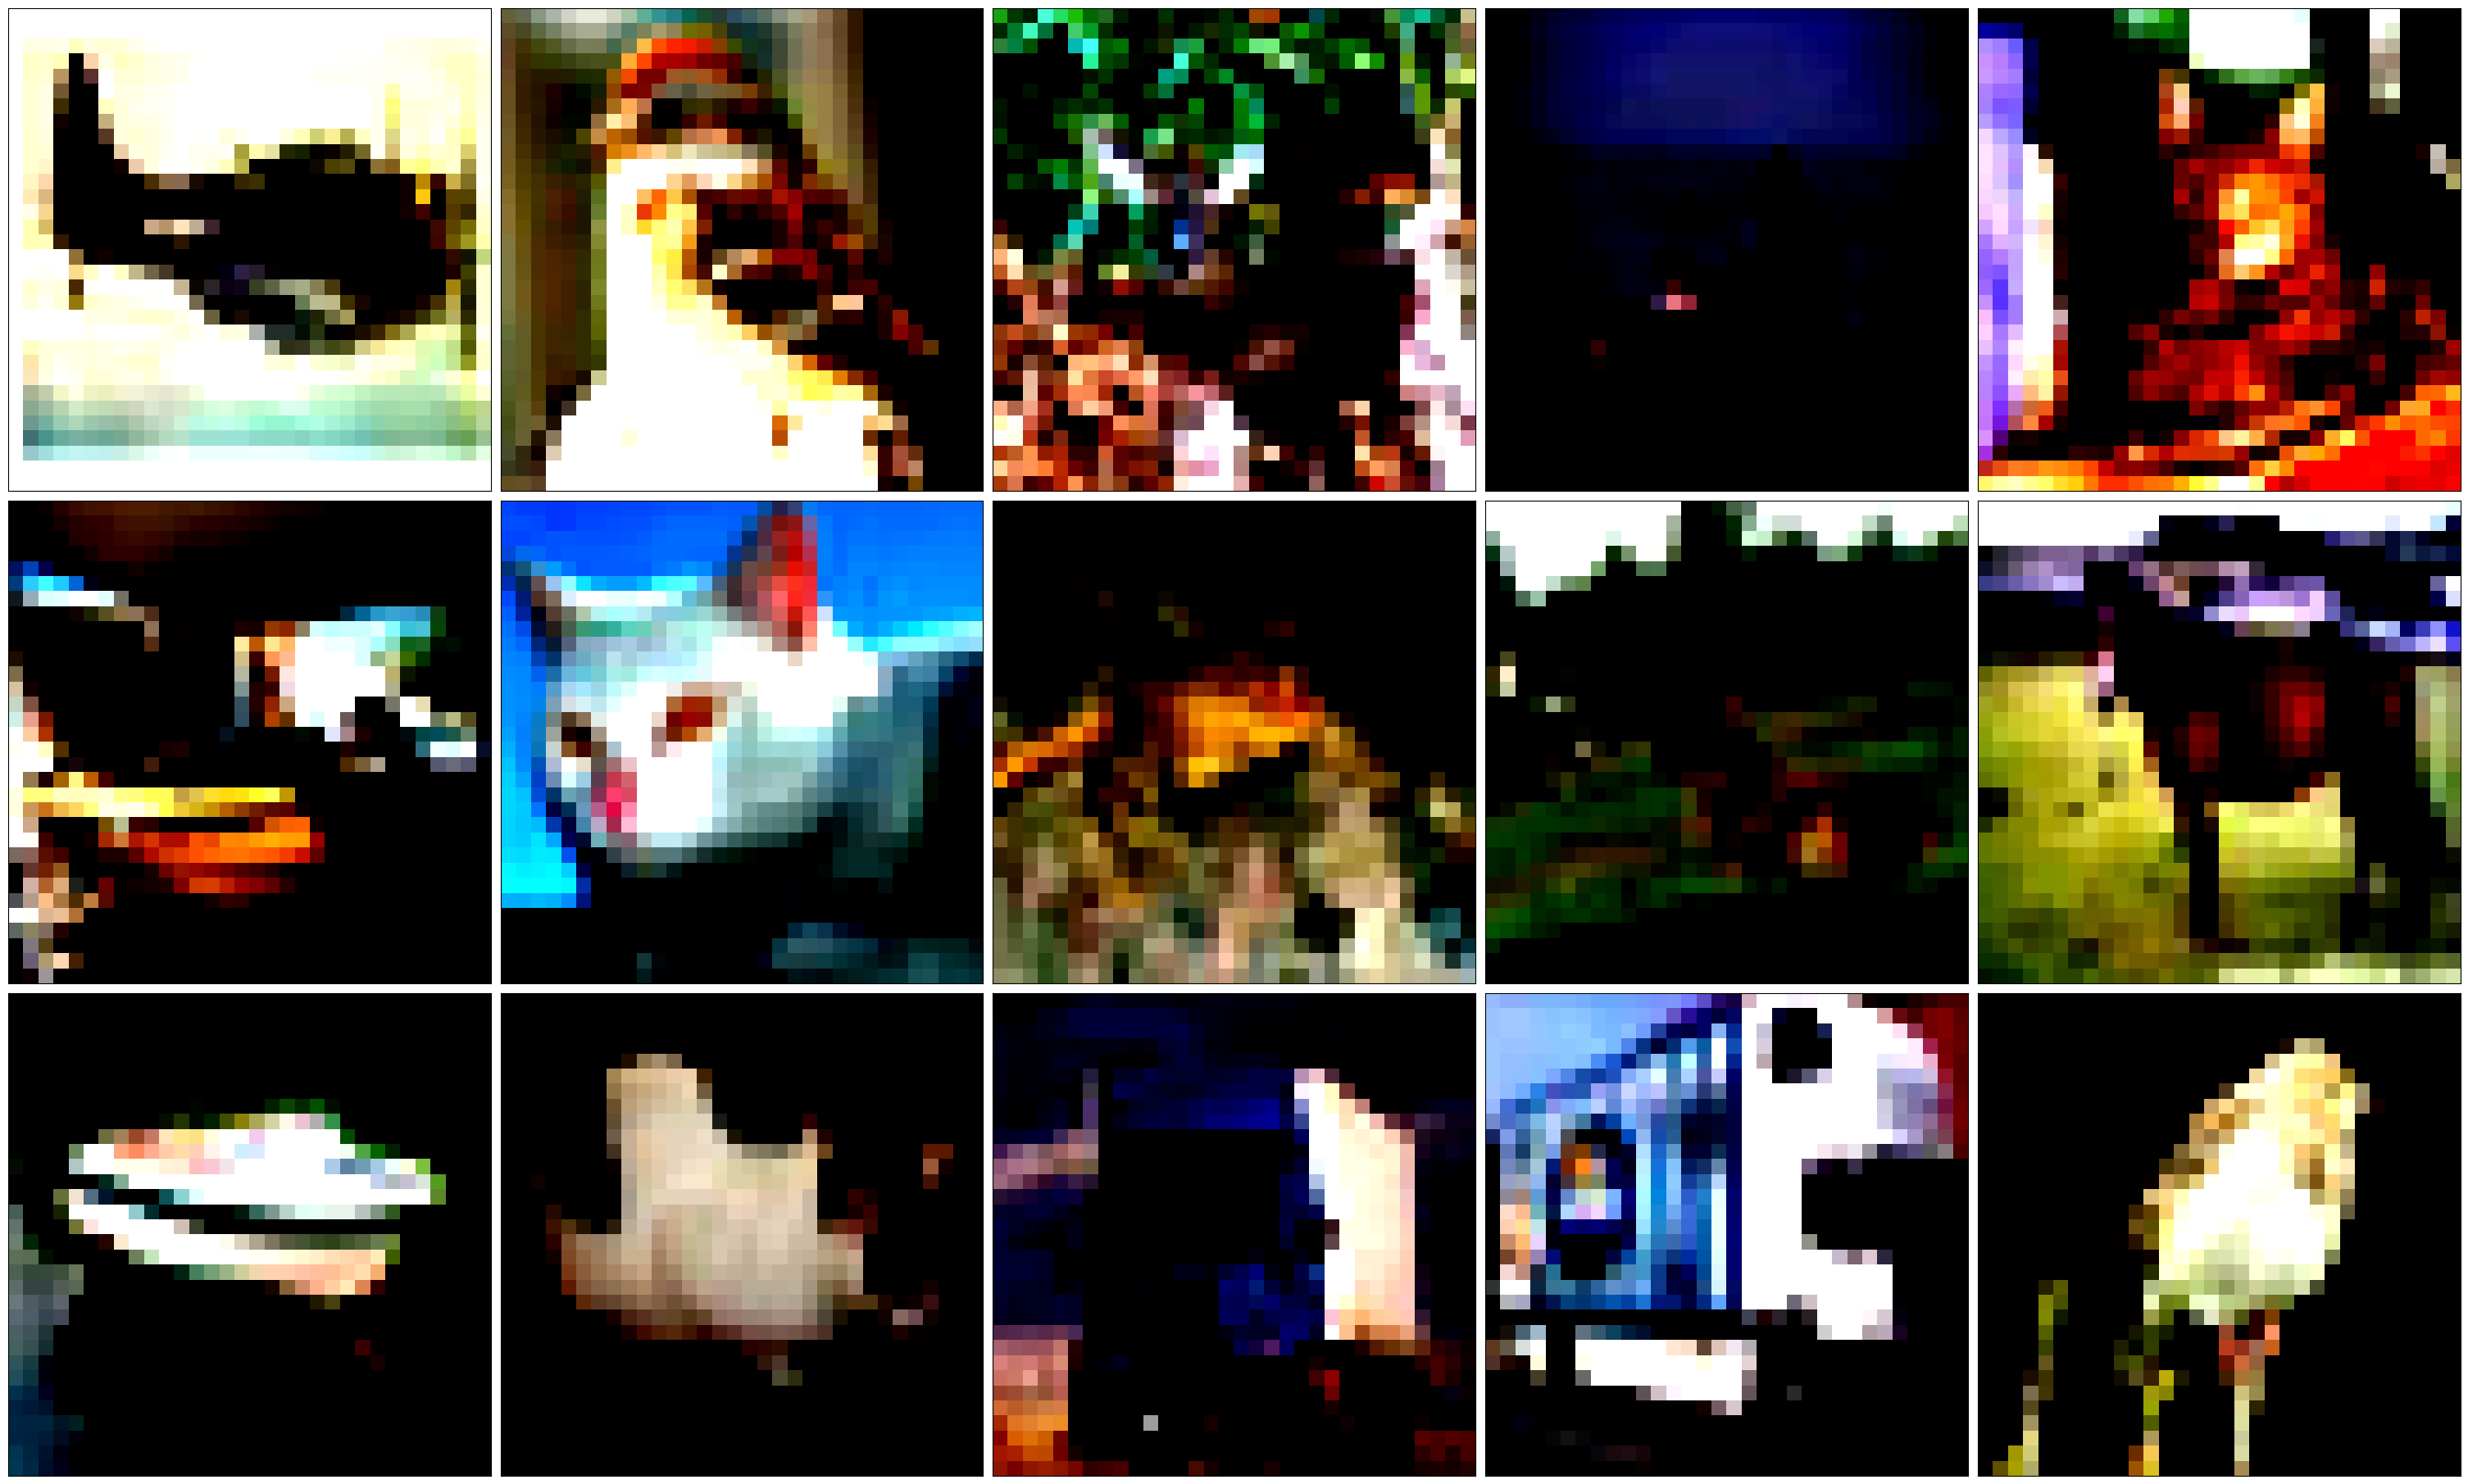

In [7]:
import matplotlib.pyplot as plt

fig , axs = plt.subplots(3,5,layout='constrained',figsize=(30,18))
for i,j in enumerate(np.random.choice(x_train.shape[0], size=15, replace=True)):
    axs.flat[i].imshow(x_train[j])
    axs.flat[i].tick_params(left=False,bottom=False,labelleft=False,labelbottom=False)

### 3. Inception module with dimensionality reduction

<center><img src="images/inception_module.png" alt="inception_module" width="600" height="auto"></center>

In [5]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, concatenate

def inception_module(x,
                filters_1x1,
                filters_3x3_reduce, filters_3x3,
                filters_5x5_reduce, filters_5x5,
                filters_max_pool_reduce,
                name=None):

    conv_1x1 = Conv2D(filters=filters_1x1, kernel_size=(1,1), strides=(1,1), padding='same', activation='relu',
                kernel_initializer=kernel_init, bias_initializer=bias_init)(x)

    conv_3x3_reduce = Conv2D(filters=filters_3x3_reduce, kernel_size=(1,1), strides=(1,1), padding='same', activation='relu',
                kernel_initializer=kernel_init, bias_initializer=bias_init)(x)
    conv_3x3 = Conv2D(filters=filters_3x3, kernel_size=(1,1), strides=(1,1), padding='same', activation='relu',
                kernel_initializer=kernel_init, bias_initializer=bias_init)(conv_3x3_reduce)

    conv_5x5_reduce = Conv2D(filters=filters_5x5_reduce, kernel_size=(1,1), strides=(1,1), padding='same', activation='relu',
                kernel_initializer=kernel_init, bias_initializer=bias_init)(x)
    conv_5x5 = Conv2D(filters=filters_5x5, kernel_size=(1,1), strides=(1,1), padding='same', activation='relu',
                kernel_initializer=kernel_init, bias_initializer=bias_init)(conv_5x5_reduce)

    max_pool = MaxPool2D(pool_size=(3,3), strides=(1,1), padding='same')(x)
    max_pool_reduce = Conv2D(filters=filters_max_pool_reduce, kernel_size=(1,1), strides=(1,1), padding='same', activation='relu',
                kernel_initializer=kernel_init, bias_initializer=bias_init)(max_pool)

    output = concatenate([conv_1x1, conv_3x3, conv_5x5, max_pool_reduce], axis=3, name=name)

    return output